In [29]:
import data
from mlp_np import *

In [30]:
#print analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def draw_metrics(mdl,x_test,y_test,title=""):
    f,ax= plt.subplots(2, 2, sharex='col',figsize=(12,12))
    draw_loss_metrics(mdl.history['train']["loss"],mdl.history['valid']["loss"],ax[0,0])
    draw_accuracy_metrics(mdl.history['train']["acc"],mdl.history['valid']["acc"],ax[1,0])
    if mdl.Classifier :draw_matrix_confusion(np.argmax(y_test, axis=1) ,np.argmax(mdl.predict(x_test), axis=1)  ,ax[0,1])
    f.suptitle(title, fontsize=12)
    ax[1,1].set_axis_off() 
    plt.show()
    
def draw_loss_metrics(loss_train,loss_val,ax):

    ax.plot(range(0,len(loss_train)), loss_train, 'g', label='Training loss')
    ax.plot(range(0,len(loss_val)), loss_val, 'b', label='validation loss')
    ax.set_title('Training and Validation loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    #ax.show()
    
def draw_accuracy_metrics(acc_train,acc_val,ax):
    ax.plot(range(0,len(acc_train)), acc_train, 'g', label='Training accuracy')
    ax.plot(range(0,len(acc_val)), acc_val, 'b', label='validation accuracy')
    ax.set_title('Training and Validation accuracy')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.legend()
    #ax.show()
    
def draw_matrix_confusion(y,y_pred,ax):

    cf_matrix = confusion_matrix(y.reshape(len(y)), y_pred.reshape(len(y_pred)))
    sn.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,  fmt='.2%', cmap='Blues',ax=ax)
    #ax.show()

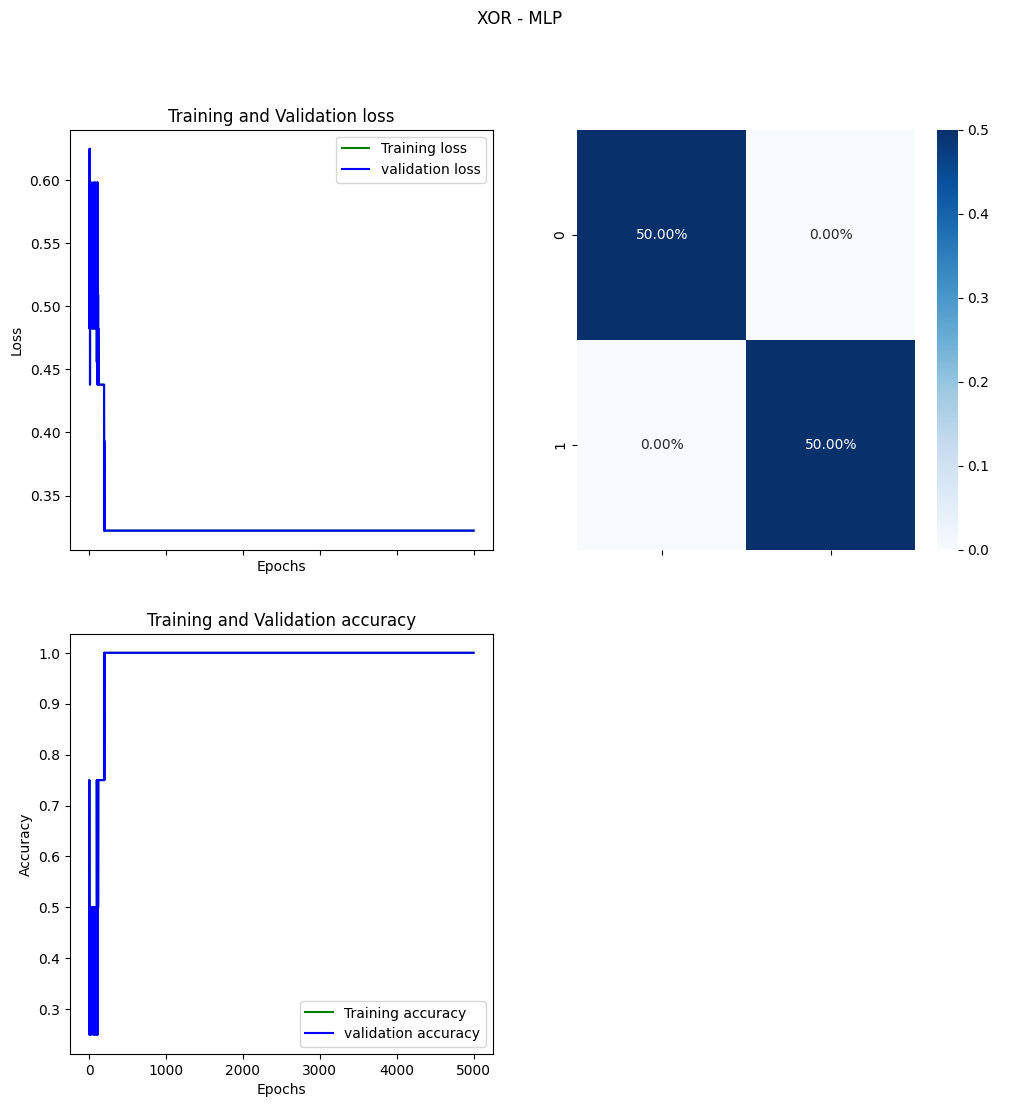

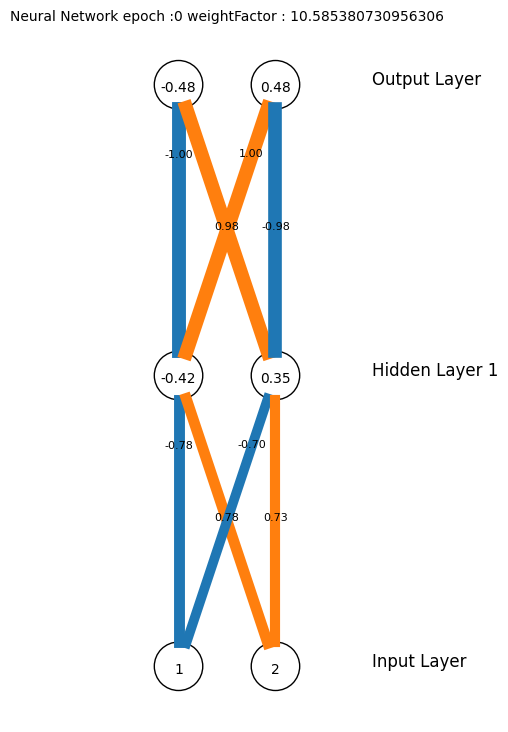

In [26]:
# XOR
# Load data 
x_train = np.array([[0,0], [0,1], [1,0], [1,1]])
y_train= np.array([[1,0], [0,1], [0,1], [1,0]])
x_valid= np.array([[0,0], [0,1], [1,0], [1,1]])
y_valid=np.array([[1,0], [0,1], [0,1], [1,0]])
x_test= np.array([[0,0], [0,1], [1,0], [1,1]])
y_test=np.array([[1,0], [0,1], [0,1], [1,0]])

n_output=2
n_input = 2

# Training parameters
learning_rate = 5
batch_size = 1
epochs = 5000

# Network configuration
network_config = (n_input,)     +(2,)        +(n_output,)

activations =    2*("sigmoid",)

# Initialize network

network = NeuralNetwork( network_config, activations=activations ,Classifier=True)

network.train(x_train, y_train, x_valid, y_valid, x_test, y_test, epochs, batch_size, learning_rate)

network.predict(x_train)

draw_metrics(network,x_test,y_test,title="XOR - MLP")
a=network.visualize()

In [6]:
#network.predict(x_train)
network.save("mdl_xor.pkl")
mdl = loadModel("mdl_xor.pkl")
mdl.predict(x_train)

array([[1, 0],
       [0, 1],
       [0, 1],
       [1, 0]])

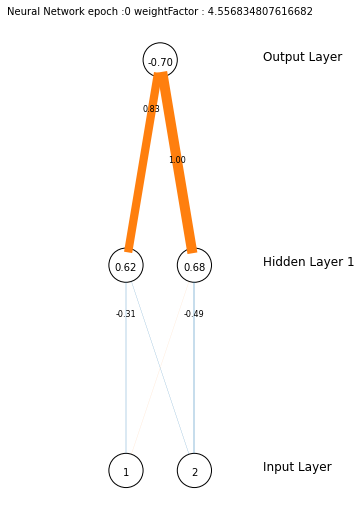

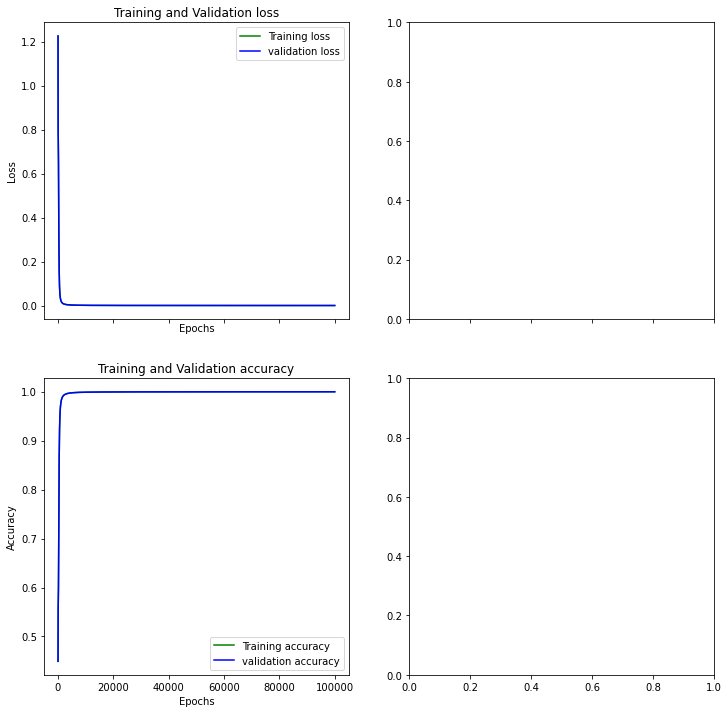

In [40]:
# Load data
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
     [ 1],
      [-1],
      [-1]
])

n_output=1
n_input = 2

# Training parameters
learning_rate = 0.1
batch_size = 4
epochs = 100000

# Network configuration
network_config = (n_input,) +(2,) +(n_output,)

activations =  ("sigmoid",)+("tanh",)
# Initialize network
network = NeuralNetwork(network_config,activations=activations,Classifier=False)
network.train(X, Y, X, Y, X, Y, epochs, batch_size, learning_rate)
a=network.visualize()
network.predict(X)
draw_metrics(network,X,Y)

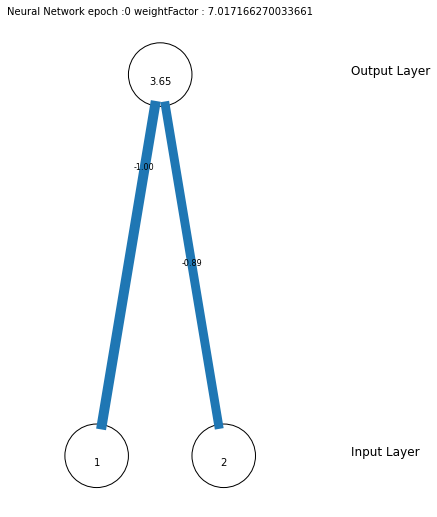

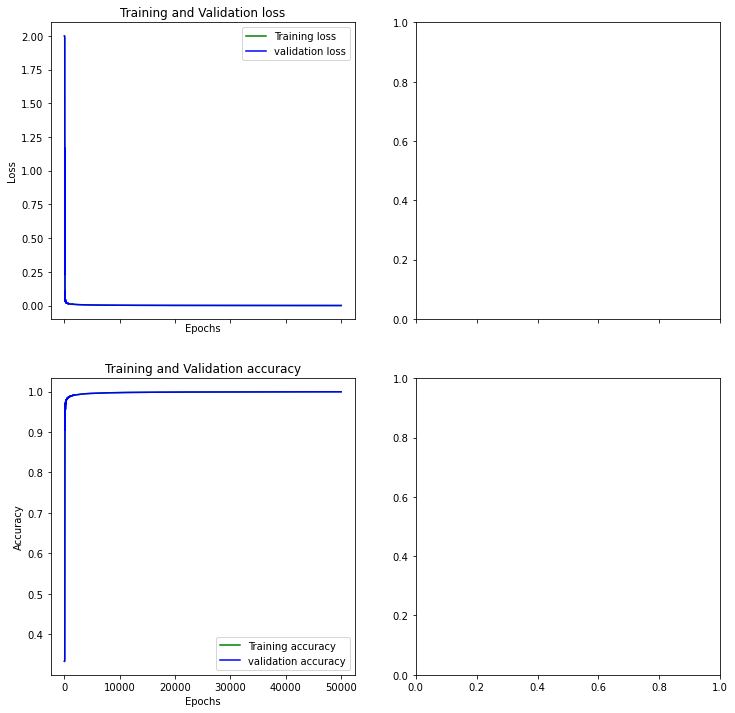

In [42]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

n_input = 2
n_output=1

# Training parameters
learning_rate = 1
batch_size = 50
epochs = 50000

# Network configuration
network_config = (n_input,) +(n_output,)
activations =  ("tanh",)
# Initialize network
network = NeuralNetwork(network_config,activations=activations,Classifier=False)
network.train(X, Y, X, Y, X, Y, epochs, batch_size, learning_rate)
a=network.visualize()
draw_metrics(network,X,Y)

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

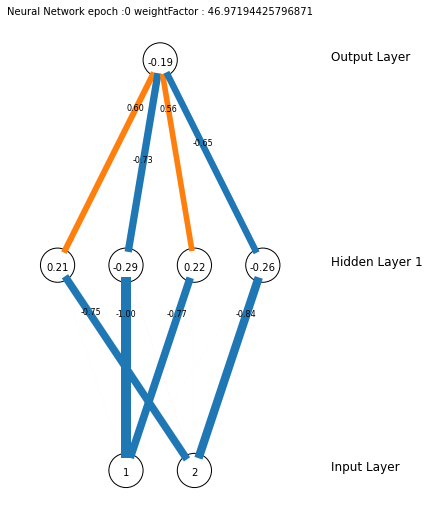

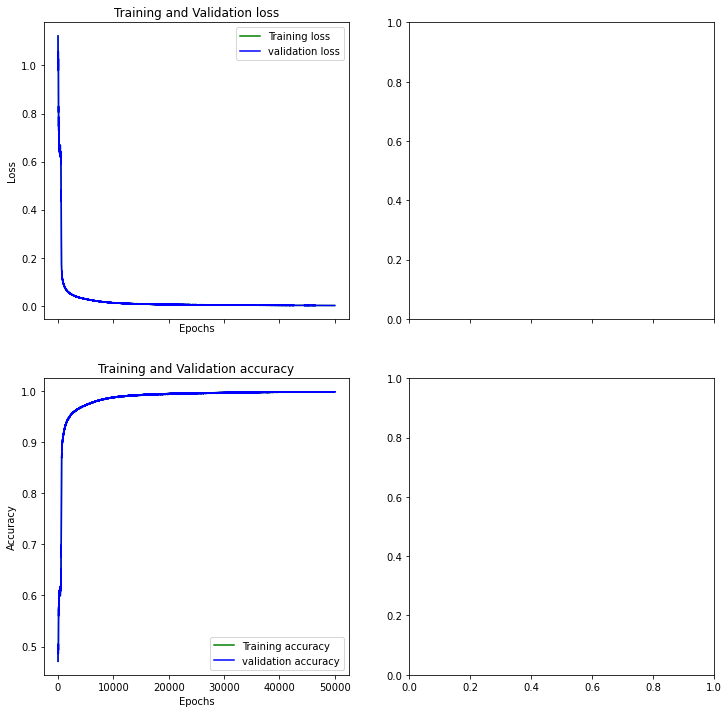

In [43]:
#CROSS 

X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1] if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else [-1] for p in X])


n_input = 2
n_output=1

# Training parameters
learning_rate = 0.5
batch_size = 40
epochs = 50000

# Network configuration
network_config = (n_input,)+(4,) +(n_output,)
activations =   ("sigmoid",)+("tanh",)
# Initialize network
network = NeuralNetwork(network_config,activations=activations,Classifier=False)
network.train(X, Y, X, Y, X, Y, epochs, batch_size, learning_rate)
a=network.visualize()
draw_metrics(network,X,Y)

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

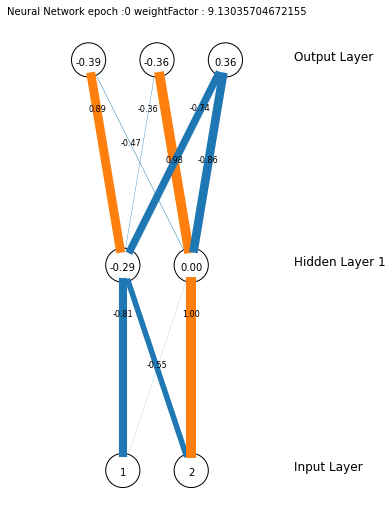

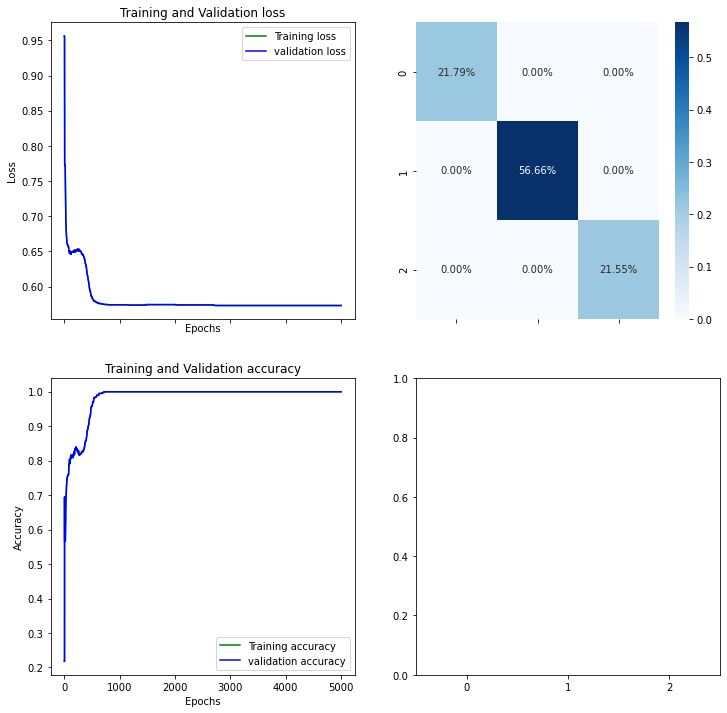

In [106]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

n_input = 2
n_output=3

# Training parameters
learning_rate = 1
batch_size = 400
epochs = 5000

# Network configuration
network_config = (n_input,)+(2,) +(n_output,)
activations =   ("sigmoid",)+("sigmoid",)
# Initialize network
network = NeuralNetwork(network_config,activations=activations,Classifier=True)
network.train(X, Y, X, Y, X, Y, epochs, batch_size, learning_rate)
a=network.visualize()
draw_metrics(network,X,Y)

In [31]:
from tqdm import tqdm
from PIL import Image, ImageOps 
import matplotlib.pyplot as plt
import matplotlib.image as img


def preprocess_dataset(paths, img_size):
    list_X, list_Y ,images = [], [],[]
    
    for path in paths:
        images = images+ [path + "/" + i  for i in os.listdir(path) ] 
    np.random.shuffle(images)
    
    for filename in tqdm(images):
        if ".j" in filename:
            #img = ImageOps.grayscale(Image.open(filename).resize(img_size))
            img = Image.open(filename).resize(img_size)
            array = np.asarray(img).flatten().tolist()

            #plt.imshow(img, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
            #plt.show()
            list_X.append(array)

            if "pizza" in filename:
                class_array =[1,0,0]
            elif "tarte aux pommes" in filename:
                class_array =[0,1,0]
            elif "tarte aux fraises" in filename:
                class_array =[0,0,1]
            list_Y.append(class_array)
            #On met 0,1,2 car nous sommes dans un modèle qui doit détecter plusieurs classes et on va renvoyer un tableau de proba (3 éléments)
            #On fait un OneHotEncoder à la main car nous possédons 3 labels

    X, Y = np.array(list_X), np.array(list_Y)
    return X / 255. ** 2, Y

In [42]:
# Entrainement du modèle avec les meilleurs paramètres
size=64
X, Y = preprocess_dataset(["dataset/train/pizza",
                         "dataset/train/tarte aux fraises",
                       "dataset/train/tarte aux pommes"
                        ],
                          (size, size))
Xtest, Ytest = preprocess_dataset(["dataset/test/pizza",
                          "dataset/test/tarte aux fraises",
                       "dataset/test/tarte aux pommes"
                         ],
                          (size, size))

Xvalidate, Yvalidate = preprocess_dataset(["dataset/test/pizza",
                           "dataset/test/tarte aux fraises",
                        "dataset/test/tarte aux pommes"
                        ],
                          (size, size))

# Training parameters
learning_rate = 0.02
batch_size = 80
epochs = 1500

# Network configuration
network_config = (len(X[0]),) + 3*(3*size*size,) + (len(Y[0]),) 
activations =  3*("relu",)+1*("relu",)
# Initialize network
network = NeuralNetwork(network_config,activations=activations,Classifier=True)

# Start training
network.train(X,Y,Xtest,Ytest,Xvalidate,Yvalidate,epochs, batch_size, learning_rate)
draw_metrics(network,Xtest,Ytest)
network.save("bestmdl.pkl")

100%|██████████| 69/69 [00:00<00:00, 730.41it/s]


KeyboardInterrupt: 

MDL : learning_rate= 0.015 | batch_size=10 | epochs=100 | NN4


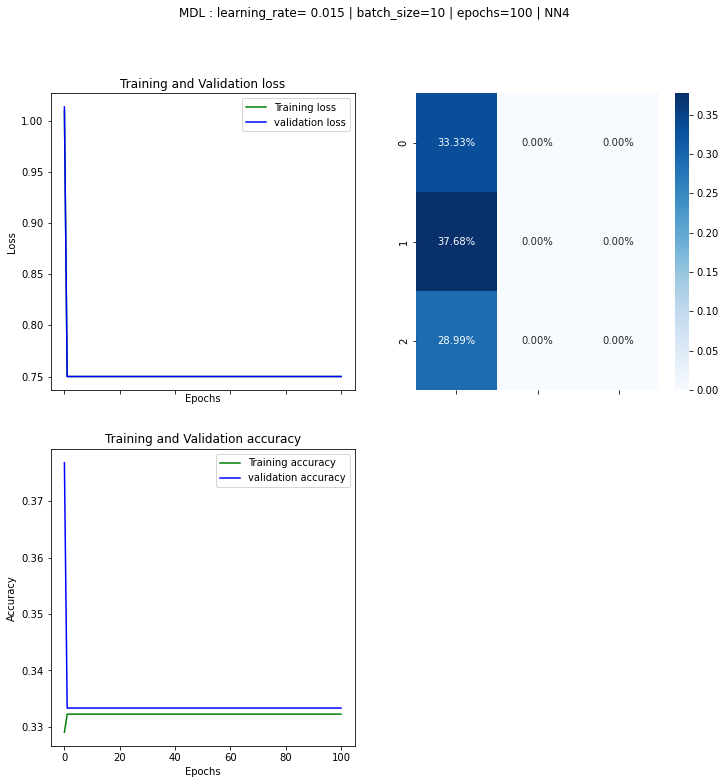

MDL : learning_rate= 0.015 | batch_size=10 | epochs=100 | NN5


In [ ]:
hyperparameters = {
    "learning_rate":[0.015,0.01],
    "batch_size":[80],
    "epochs":[1000],
    "layers":[ [ (len(X[0]),) + 3*(3*size*size,) + (len(Y[0]),), 3*("relu",)+1*("sigmoid",)],
              [ (len(X[0]),) + 3*(3*size*size,) + (len(Y[0]),), 3*("relu",)+1*("relu",)]]
}


def mdl_hyperparameters(X,Y,Xtest,Ytest,Xvalidate,Yvalidate, hyperparameters,Classifier=True):
    for learning_rate in hyperparameters["learning_rate"]:
        for batch_size in hyperparameters["batch_size"]:
            for epochs in hyperparameters["epochs"]:
                for (network_config, activations) in hyperparameters["layers"]:
                    title= ("MDL : learning_rate= " + str(learning_rate) + " | batch_size="+ str(batch_size)+
                          " | epochs=" + str(epochs) + 
                          " | NN" +str(len( network_config)) )
                    print("MDL : learning_rate= " + str(learning_rate) +
                          " | batch_size="+ str(batch_size)+
                          " | epochs=" + str(epochs) + 
                          " | NN" +str(len( network_config))                 )
                    print (activations,end=":")
                    
                    network = NeuralNetwork(network_config,activations=activations,Classifier=Classifier)
                    # Start training
                    network.train(X,Y,Xtest,Ytest,Xvalidate,Yvalidate,epochs, batch_size, learning_rate)
                    draw_metrics(network,Xtest,Ytest,title=title)

mdl_hyperparameters(X,Y,Xtest,Ytest,Xvalidate,Yvalidate, hyperparameters,Classifier=True)

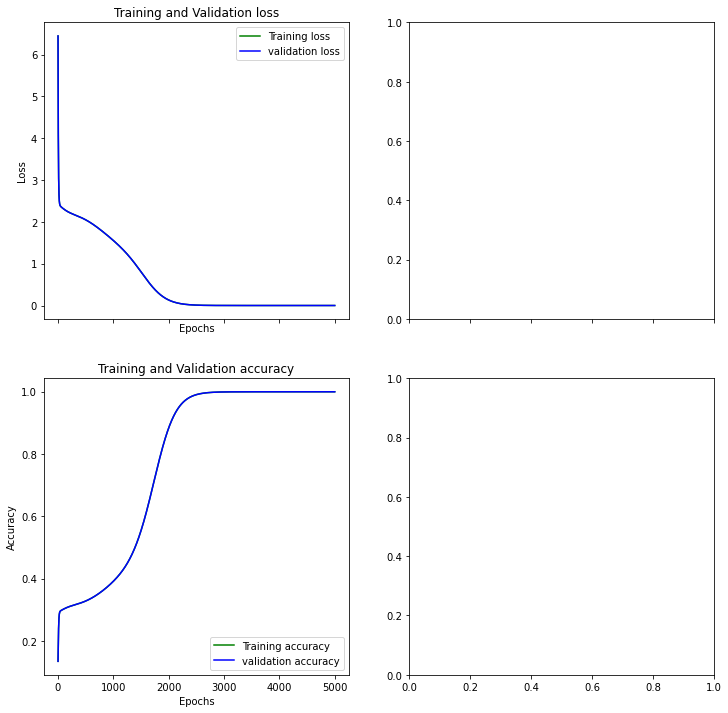

In [56]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
     [ 2],
      [1],
      [-2],
      [-1]
])


# Training parameters
learning_rate = 0.1
batch_size = 10   
epochs = 5000

# Network configuration
network_config = (len(X[0]),) + (4,) + (len(Y[0]),)
activations =                   ("sigmoid",)+("linear",)
# Initialize network
network = NeuralNetwork(network_config,activations=activations,Classifier=False)

# Start training
network.train(X,Y,X,Y,X,Y,epochs, batch_size, learning_rate)
draw_metrics(network,X,Y)

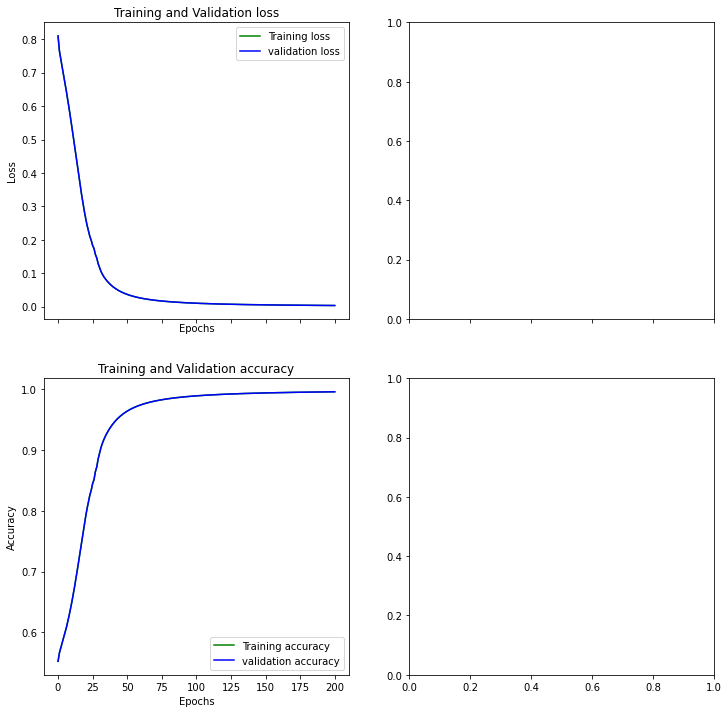

In [74]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      [1],
      [-1],
      [-1]
])


# Training parameters
learning_rate = 1
batch_size = 3    
epochs = 200

# Network configuration
network_config = (len(X[0]),) + 1*(2,) + (len(Y[0]),)
activations =                   ("sigmoid",)+("tanh",)
# Initialize network
network = NeuralNetwork(network_config,activations=activations,Classifier=False)

# Start training
network.train(X,Y,X,Y,X,Y,epochs, batch_size, learning_rate)
draw_metrics(network,X,Y)

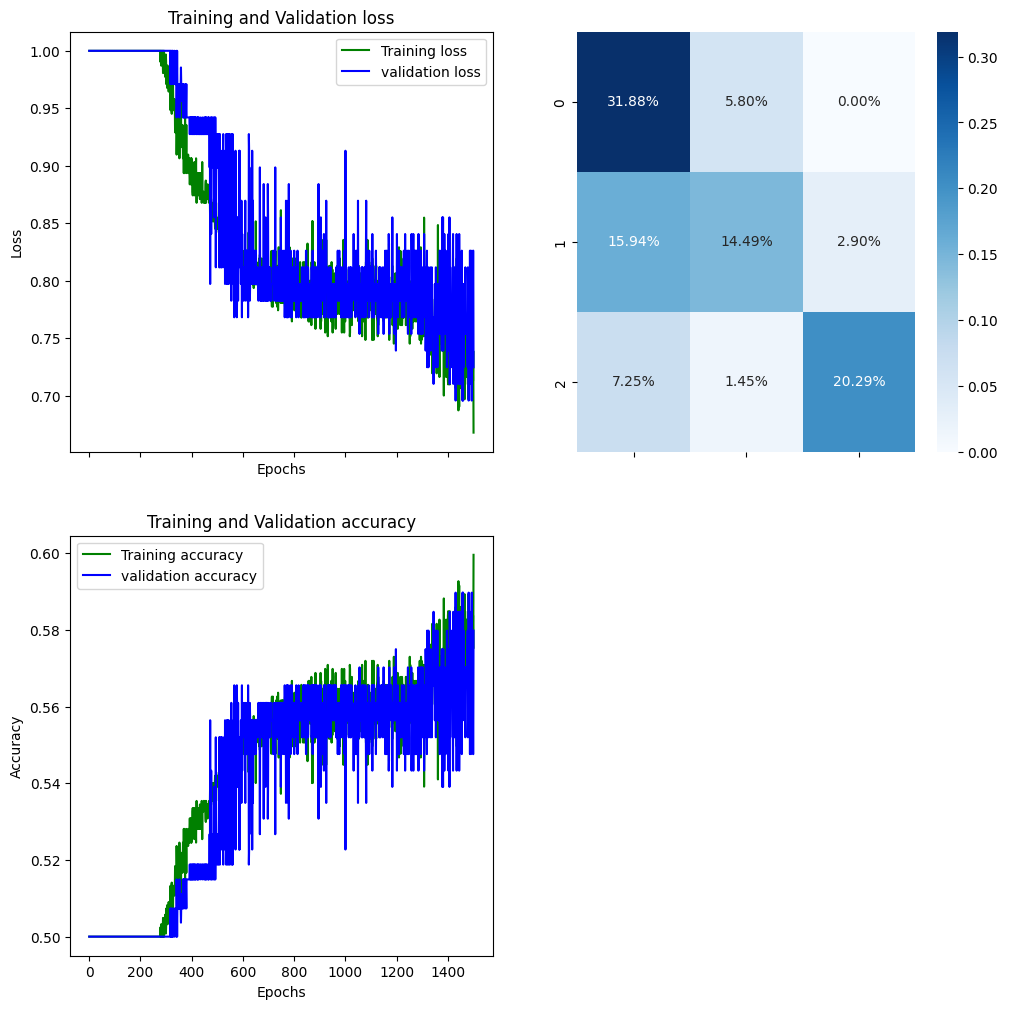

In [34]:
draw_metrics(network,Xtest,Ytest)
network.save("bestmdl.pkl")

In [35]:
def showpredictions(mdl,images):
    X = preprocess_images(images) 
    predictions = mdl.predict(X,True)
    results =[ [labels[i],predictions[1][index][i]] for index,i in enumerate(np.argmax(predictions[1], axis=1)) ]
    #f,ax= plt.subplots(len(images), 2, sharex='col',figsize=(6*len(images),12))    
    fig = plt.figure(figsize=(12,6*len(images)))
    for i,filename in enumerate(images):
        img = Image.open(filename).resize((128,128))
        ax = fig.add_subplot(len(images), 2, i+1)
        imgplot = plt.imshow(img)
        ax.set_title('Predict :' + results[i][0] +" " +  str( int(100*results[i][1]) )+"%" )
    plt.show()


100%|██████████| 7/7 [00:00<00:00, 696.56it/s]


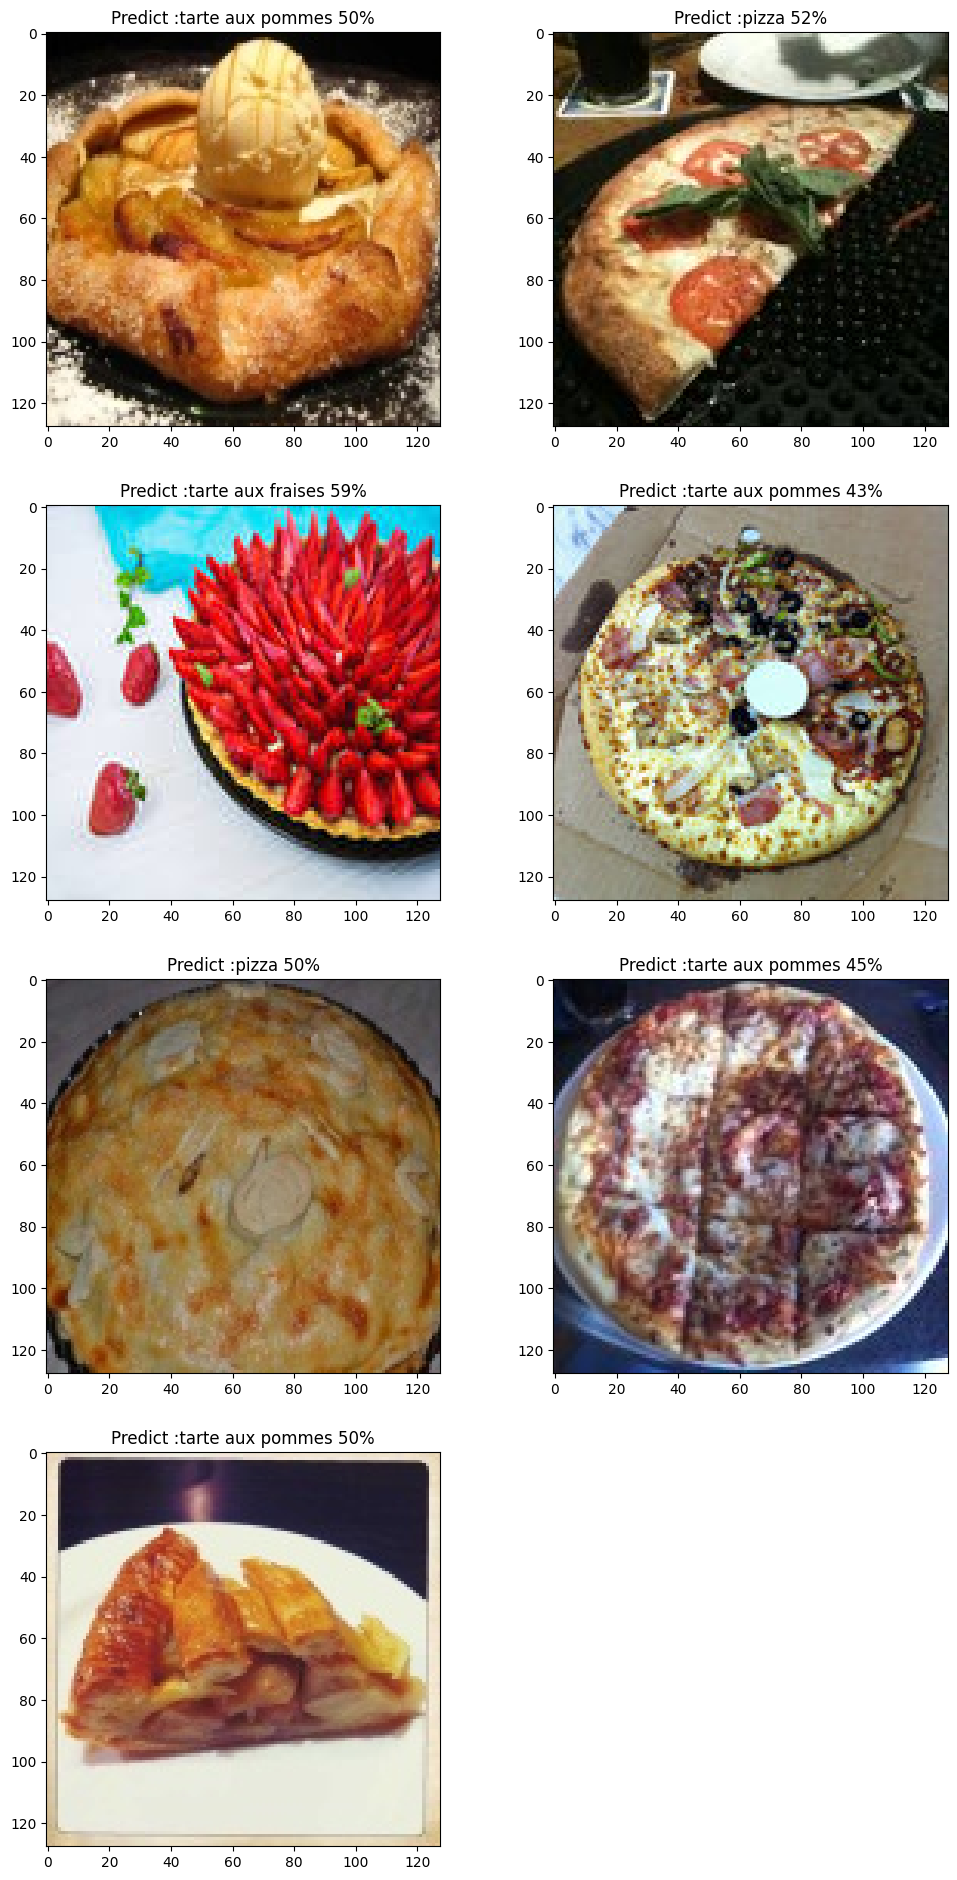

In [36]:
mdl =loadModel("bestmdl.pkl")
images = ["dataset/test/tarte aux pommes/4WRTIMLL4M0X.jpg",
              "dataset/test/pizza/709273.jpg",
              "dataset/test/tarte aux fraises/istockphoto-1140297774-612x612.jpg",
         "dataset/test/pizza/741491.jpg",
              "dataset/train/tarte aux pommes/0JO59CE0JBU9.jpg",
         "dataset/test/pizza/762788.jpg",
              "dataset/train/tarte aux pommes/4V0BJ961YNEO.jpg"]
showpredictions(mdl,images)

In [37]:
X= preprocess_images(images) 
X

100%|██████████| 7/7 [00:00<00:00, 663.25it/s]


array([[1.53787005e-05, 1.53787005e-05, 1.53787005e-05, ...,
        1.79930796e-03, 1.67627835e-03, 1.52249135e-03],
       [5.84390619e-04, 4.30603614e-04, 1.53787005e-04, ...,
        1.53787005e-04, 2.15301807e-04, 1.53787005e-04],
       [3.38331411e-03, 3.49096501e-03, 3.72164552e-03, ...,
        3.12187620e-03, 3.32179931e-03, 3.56785852e-03],
       ...,
       [1.06113033e-03, 9.84236832e-04, 1.07650903e-03, ...,
        1.38408304e-03, 1.32256824e-03, 1.35332564e-03],
       [2.15301807e-04, 2.61437908e-04, 5.07497116e-04, ...,
        3.56785852e-03, 3.73702422e-03, 3.76778162e-03],
       [3.52172241e-03, 3.26028451e-03, 2.87581699e-03, ...,
        3.32179931e-03, 2.93733180e-03, 2.18377547e-03]])

In [38]:
predictions = mdl.predict(X,True)
predictions

(array([[0, 1, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 0, 0],
        [1, 0, 0],
        [0, 0, 0],
        [0, 1, 0]]),
 array([[0.39941217, 0.50625312, 0.09061798],
        [0.52621126, 0.37473296, 0.09268392],
        [0.048012  , 0.29221729, 0.5978564 ],
        [0.33038698, 0.43592463, 0.23367306],
        [0.50177607, 0.47125343, 0.02963351],
        [0.39491682, 0.45049356, 0.15223385],
        [0.13572255, 0.506728  , 0.32447961]]))

In [39]:
[ [ labels[i],predictions[1][index][i]] for index,i in enumerate(np.argmax(predictions[1], axis=1)) ]

[['tarte aux pommes', 0.5062531209869323],
 ['pizza', 0.5262112552039571],
 ['tarte aux fraises', 0.5978564015689808],
 ['tarte aux pommes', 0.4359246329160162],
 ['pizza', 0.5017760721191671],
 ['tarte aux pommes', 0.4504935590581242],
 ['tarte aux pommes', 0.5067280033350473]]

In [40]:
np.argmax(predictions[1], axis=1)

array([1, 0, 2, 1, 0, 1, 1], dtype=int64)

In [41]:
labels

['pizza', 'tarte aux pommes', 'tarte aux fraises']